In [1]:
import os
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle

In [2]:
data_dir = "/home/alex/Projects/GRAN_social/exp/GRAN"
os.chdir(data_dir)

def load_from_constructed(path, keep_largest = True, min_size = None):
    graphs = []
    for f in os.listdir(path):
        g = nx.read_edgelist(os.path.join(path, f))
        if min_size is not None:
            if g.number_of_nodes() >= min_size:
                graphs.append(g)
        else:
            graphs.append(g)
    
    if keep_largest:
        out_graphs = []
        for gg in graphs:
            CGs = [gg.subgraph(c) for c in nx.connected_components(gg)]
            CGs = sorted(CGs, key=lambda x: x.number_of_nodes(), reverse=True)
            if len(CGs) != 0:
                out_graphs += [CGs[0]]

        return out_graphs
    else:
        return graphs

In [22]:
def plot_examples(paths, labels, data_dir):

    fig, axes = plt.subplots(ncols = 3, nrows = 3*len(paths), figsize = (8 + 0.2, 6*len(paths)), constrained_layout = True)
    print(axes)
    for ind_row, row in enumerate(tqdm(axes)):
        root_path = os.path.join(data_dir, paths[int(ind_row/3)])
        print(root_path)
        if ind_row % 3 == 0:
            graphs = load_from_constructed(os.path.join(root_path, "sample_graphs"), min_size = 11)
            row[0].set_ylabel(f"Real\n{labels[int(ind_row/3)]}")
            # row[0].set_ylabel(f"Sample,\n {paths[int(ind_row/2)]}")
        elif ind_row % 3 == 1:
            graphs = load_from_constructed(os.path.join(root_path, "pred_graphs"))
            row[0].set_ylabel(f"GRAN\n{labels[int(ind_row/3)]}")
        else:
            graphs = load_from_constructed(os.path.join(root_path, "rmat_graphs"), min_size = 11)
            row[0].set_ylabel(f"R-MAT\n{labels[int(ind_row/3)]}")            
        shuffle(graphs)

        for ind_col, ax in enumerate(row):
            
            ax.axis('equal')
            
            G = graphs[ind_col]
            print(G)
#             nx.draw(G)
#             plt.show()
            
            # pos = nx.nx_pydot.graphviz_layout(G, prog="sfdp")
            pos = nx.spring_layout(G, iterations = 100)
            # pos = nx.kamada_kawai_layout(G)
            
            # clustering = nx.degree(G)
            
            # print(clustering)
            
            # colours = []
            # for c in clustering:
            #     colours.append(clustering[c])
            nx.draw_networkx_nodes(
                G,
                pos,
                node_size=10,
                node_color= '#336699',
                alpha=1,
                linewidths=0.5,
                edgecolors="black",
                ax = ax)
            nx.draw_networkx_edges(G, pos, alpha=0.75, width=4, node_size = 10, ax = ax)
    plt.show()
    # plt.savefig(f"generated_visualisations_{labels[0]}.pdf", dpi = 300)

def community_labels(communities):
    keys = list(communities.keys())
    labels = []
    
    for k in keys:
        label = communities[k]
        if label not in labels:
            labels.append(label)
            
    return labels

[[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]]


  0%|                                                                              | 0/3 [00:00<?, ?it/s]

/home/alex/Projects/GRAN_social/exp/GRAN/TWITCH
Graph with 399 nodes and 871 edges
Graph with 385 nodes and 777 edges
Graph with 406 nodes and 750 edges


 33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.44s/it]

/home/alex/Projects/GRAN_social/exp/GRAN/TWITCH
Graph with 128 nodes and 193 edges
Graph with 267 nodes and 490 edges


 67%|██████████████████████████████████████████████▋                       | 2/3 [00:01<00:00,  1.17it/s]

Graph with 232 nodes and 441 edges
/home/alex/Projects/GRAN_social/exp/GRAN/TWITCH
Graph with 389 nodes and 796 edges
Graph with 367 nodes and 772 edges
Graph with 392 nodes and 804 edges


100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.06s/it]


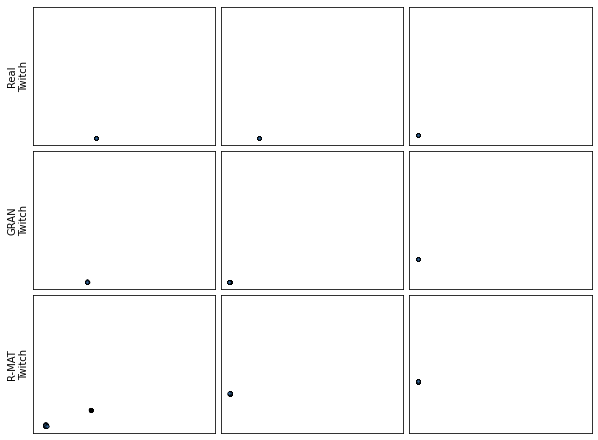

In [23]:
paths = ["TWITCH"]
labels = ["Twitch"]

plot_examples(paths, labels, data_dir)

  0%|                                                                              | 0/3 [00:00<?, ?it/s]

/home/alex/Projects/GRAN_social/exp/GRAN/FB_LARGE


 33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.15s/it]

/home/alex/Projects/GRAN_social/exp/GRAN/FB_LARGE


 67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.16s/it]

/home/alex/Projects/GRAN_social/exp/GRAN/FB_LARGE


100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.22s/it]


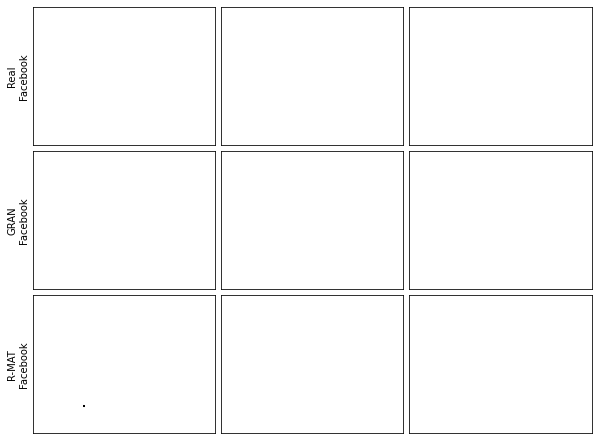

In [5]:
paths = ["FB_LARGE"]
labels = ["Facebook"]

plot_examples(paths, labels, data_dir)

  0%|                                                                              | 0/3 [00:00<?, ?it/s]

/home/alex/Projects/GRAN_social/exp/GRAN/GIT


 33%|███████████████████████▎                                              | 1/3 [00:01<00:02,  1.30s/it]

/home/alex/Projects/GRAN_social/exp/GRAN/GIT


 67%|██████████████████████████████████████████████▋                       | 2/3 [00:02<00:01,  1.43s/it]

/home/alex/Projects/GRAN_social/exp/GRAN/GIT


100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.33s/it]


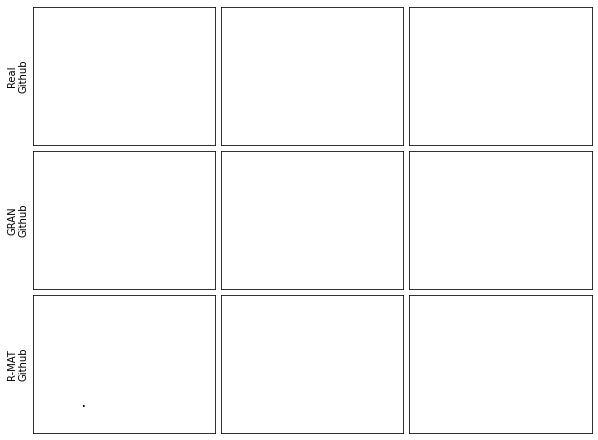

In [6]:
paths = ["GIT"]
labels = ["Github"]

plot_examples(paths, labels, data_dir)

 33%|███████████████████████▎                                              | 1/3 [00:00<00:00,  6.45it/s]

/home/alex/Projects/GRAN_social/exp/GRAN/DEEZER_EGO
/home/alex/Projects/GRAN_social/exp/GRAN/DEEZER_EGO


100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.21it/s]


/home/alex/Projects/GRAN_social/exp/GRAN/DEEZER_EGO


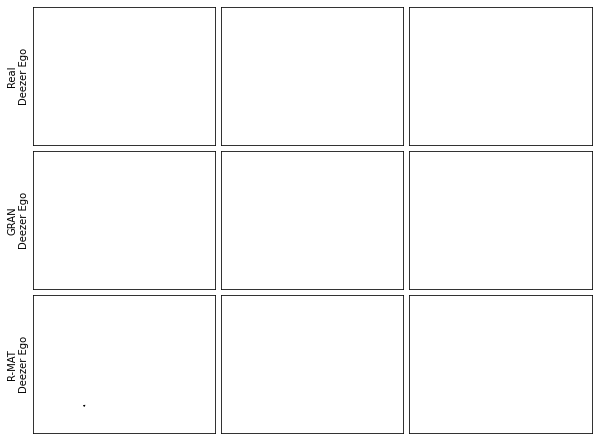

In [7]:
paths = ["DEEZER_EGO"]
labels = ["Deezer Ego"]

plot_examples(paths, labels, data_dir)

In [8]:
facebook_graphs_real = load_from_constructed(os.path.join(os.path.join(data_dir, "FB_LARGE"), "sample_graphs"))
facebook_graphs_gen  = load_from_constructed(os.path.join(os.path.join(data_dir, "FB_LARGE"), "pred_graphs"))

twitch_graphs_real = load_from_constructed(os.path.join(os.path.join(data_dir, "TWITCH"), "sample_graphs"))
twitch_graphs_gen  = load_from_constructed(os.path.join(os.path.join(data_dir, "TWITCH"), "pred_graphs"))

github_graphs_real = load_from_constructed(os.path.join(os.path.join(data_dir, "GIT"), "sample_graphs"))
github_graphs_gen  = load_from_constructed(os.path.join(os.path.join(data_dir, "GIT"), "pred_graphs"))

deezer_graphs_real = load_from_constructed(os.path.join(os.path.join(data_dir, "DEEZER_EGO"), "sample_graphs"))
deezer_graphs_gen  = load_from_constructed(os.path.join(os.path.join(data_dir, "DEEZER_EGO"), "pred_graphs"))

In [9]:
# # import networkx.algorithms.community as nx_comm
# import community as lv
# import networkx.algorithms.community as comm



# datasets = {"facebook_real":{"data":facebook_graphs_real},
#             "facebook_gen":{"data":facebook_graphs_gen},
#             "git_real":{"data":github_graphs_real},
#             "git_gen":{"data":github_graphs_gen},
#             "twitch_real":{"data":twitch_graphs_real},
#             "twitch_gen":{"data":twitch_graphs_gen},
#             "deezer_real":{"data":deezer_graphs_real},
#             "deezer_gen":{"data":deezer_graphs_gen}}

# keys = list(datasets.keys())

# for k in keys:
#     print(k)
#     graphs = datasets[k]["data"]
    
#     densities  = [nx.density(g) for g in graphs]
#     print("Densities done")
#     nodes      = [nx.number_of_nodes(g) for g in graphs]
#     print("Nodes done")
#     # diameters  = [nx.diameter(g) for g in graphs]
#     # print("Print diameters")
#     coms = []
    
#     for g in graphs:
#         communities = lv.best_partition(g)
#         # print(community_labels(communities))
#         coms.append(len(community_labels(communities)))
    
#     # len(lv.best_partition(g)) for g in tqdm(graphs)]
#     print("Calculated")
#     datasets[k]["metrics"] = {"num_graphs":len(graphs),
#                               "min_nodes":min(nodes),
#                              "max_nodes":max(nodes),
#                              "min_density":min(densities),
#                              "max_density":max(densities),
#                              "min_coms":min(coms),
#                              "max_coms":max(coms)}#,
#                              #"min_diameter":min(diameters),
#                              #"max_diameter":max(diameters)}
    
# # print(datasets)
        

In [10]:
# user_dict = dict(datasets)


# for k in keys:
#     del user_dict[k]["data"]
# print(user_dict)

# frame = pd.DataFrame.from_dict({(i,j): user_dict[i][j] 
#                            for i in user_dict.keys() 
#                            for j in user_dict[i].keys()},
#                        orient='index')
# print(frame.transpose())
# print(frame.transpose().style.to_latex())

In [11]:
# nodes_gen  = []
# nodes_real = []



# for g in deezer_graphs_gen:
#     # if g.number_of_nodes() >= 11:
#     nodes_gen.append(g.number_of_nodes())

# for g in deezer_graphs_real:
#     if g.number_of_nodes() >= 11:
#         nodes_real.append(g.number_of_nodes())

# plt.figure(figsize = (4,3))    

# plt.hist([nodes_gen, nodes_real], label=["Generated", "Real"], bins = 50, histtype = "stepfilled", alpha = 0.5)
# plt.hist([nodes_gen, nodes_real], bins = 50, color=["black", "black"], histtype = "step")

# plt.ylabel("Number of graphs")
# plt.xlabel(r"Size of graph $|V|$")

# plt.legend()
# # plt.xlim([0, 80])
# plt.yscale('log')
# plt.tight_layout()
# plt.savefig("deezer_hists.png", dpi = 300)
# plt.show()